In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

## Get the Data

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

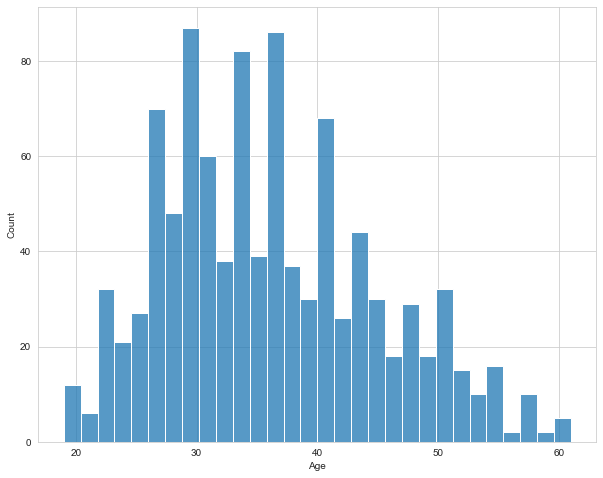

In [6]:
plt.figure(figsize=(10,8))
sns.histplot(ad_data['Age'], bins=30)

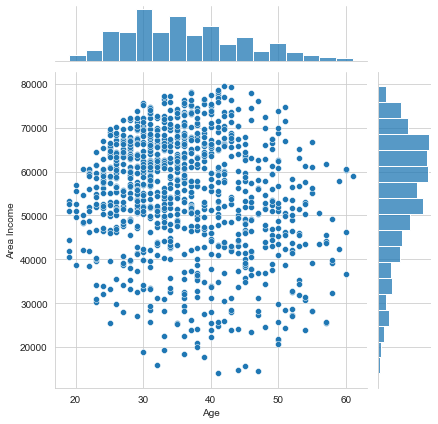

In [7]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

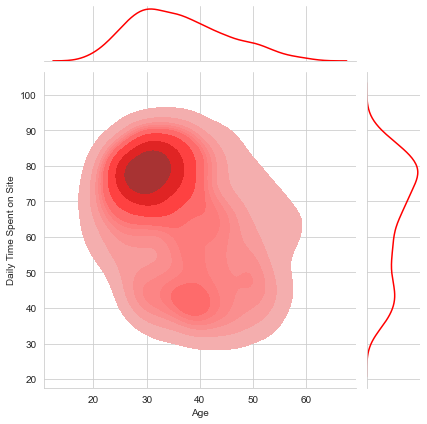

In [8]:
g = sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='red', shade=True)

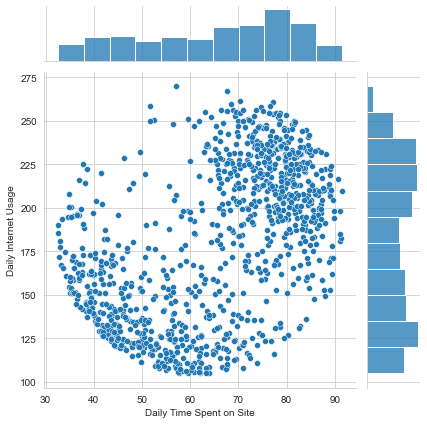

In [9]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data)

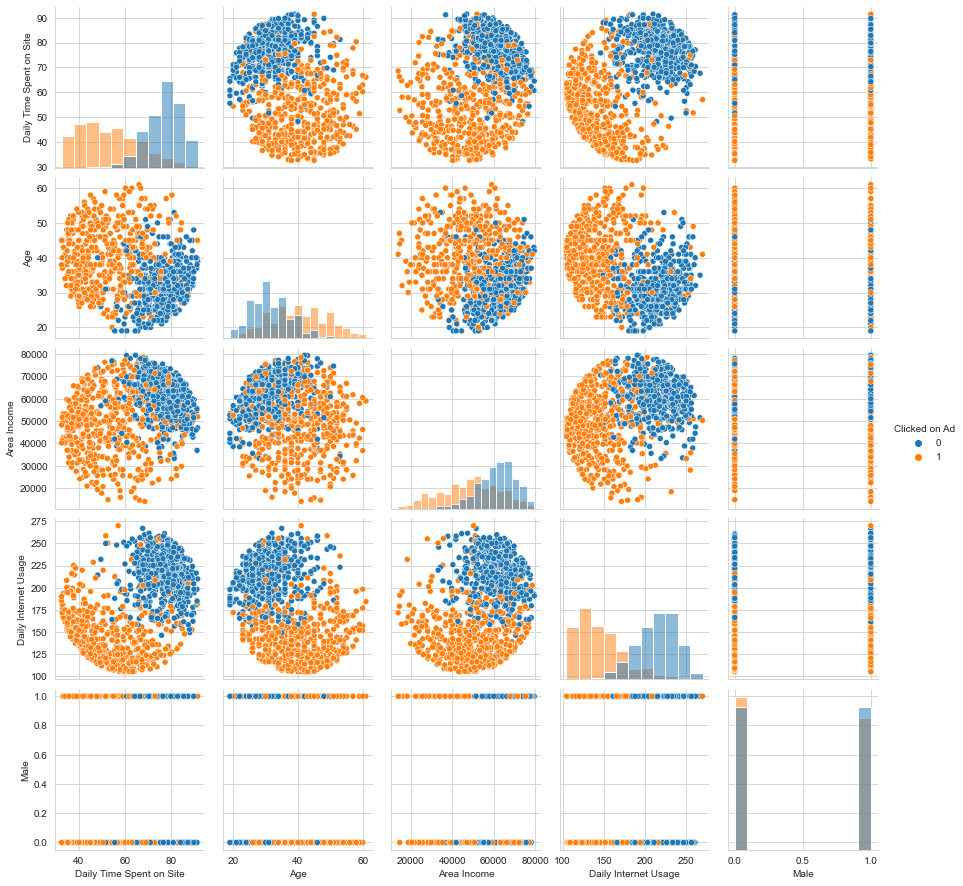

In [10]:
sns.pairplot(data=ad_data, hue='Clicked on Ad', diag_kind='hist')

In [11]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [12]:
ad_data['Ad Topic Line'].nunique()

1000

In [13]:
ad_data['City'].nunique()

969

In [14]:
ad_data['Country'].nunique()

237

In [15]:
ad_data['Timestamp'].nunique()

1000

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [18]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X, y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(std_X, y, test_size=0.3, random_state=101)

In [20]:
# convert pandas dateframe to numpy 2d array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Train model

In [21]:
def check_grad(X, y, w, lam=0.001): # check grad at w
    
    def sigmoid(s):
        """
        s is an numpy array 
        return the sigmoid function of each element of s
        """
        return 1/(1 + np.exp(-s))
    
    def grad(w):
        N = X.shape[0]
        z = sigmoid(X.dot(w))
        return 1/N * X.T.dot(z - y) + lam*w
    
    def cost(w):
        z = sigmoid(X.dot(w)) 
        N = X.shape[0]
        # return -np.mean(y*np.log(z) + (1-y)*np.log(1-z)) + 0.5*lam/N * w.T.dot(w)
        return 1/N * (-y.T.dot(np.log(z)) - (1-y).T.dot(np.log(1-z)) + lam/2 * w.T.dot(w))
    
    num_grad = np.zeros_like(w) # numerical grad at w
    eps = 1e-6
    numElems = w.shape[0]
    # calculate the numerical gradient
    for i in range(numElems):
        w1 = w.copy()
        w2 = w.copy()
        w1[i] += eps
        w2[i] -= eps
        num_grad[i] = (cost(w1) - cost(w2))/(2*eps)
        
    diff = np.linalg.norm(num_grad - grad(w))
    print(f'Difference between two methods is {diff}')

In [22]:
def GD(X_train, y_train, w_init, lam=0.001, lr=0.1, nEpoches=100):
    
    def sigmoid(s):
        """
        s is an numpy array 
        return the sigmoid function of each element of s
        """
        return 1/(1 + np.exp(-s))
    
    def grad(w):
        N = X_train.shape[0]
        z = sigmoid(X_train.dot(w))
        return 1/N * X_train.T.dot(z - y_train) + lam*w
    
    def cost(w):
        N = X_train.shape[0]
        z = sigmoid(X_train.dot(w))
        # return -np.mean(y_train*np.log(z) + (1-y_train)*np.log(1-z)) + 0.5*lam/N * w.T.dot(w)
        return 1/N * (-y_train.T.dot(np.log(z)) - (1-y_train).T.dot(np.log(1-z)) + lam/2 * w.T.dot(w))
    
    w = w_init
    c = [cost(w_init).item()] # a vector saving the history of cost values
    
    for epoch in range(nEpoches):
        w = w -lr*grad(w)
        c.append(cost(w).item())
        
    return (w, c)

In [23]:
def SGD(X_train, y_train, w_init, lam=0.001, lr=0.1, nEpoches=100):
    
    def sigmoid(s):
        """
        s is an numpy array 
        return the sigmoid function of each element of s
        """
        return 1/(1 + np.exp(-s))
    
    def cost(w):
        N = X_train.shape[0]
        z = sigmoid(X_train.dot(w))
        # return -np.mean(y_train*np.log(z) + (1-y_train)*np.log(1-z)) + 0.5*lam/N * w.T.dot(w)
        return 1/N * (-y_train.T.dot(np.log(z)) - (1-y_train).T.dot(np.log(1-z)) + lam/2 * w.T.dot(w))
     
    w = w_init
    c = [cost(w_init).item()] # a vector saving the history of cost values
    N, d = X_train.shape[0], X_train.shape[1]
    
    for epoch in range(nEpoches):
        mix_ids = np.random.permutation(N)
        for i in mix_ids:
            xi = X_train[i].reshape((1, d))
            yi = y_train[i]
            zi = sigmoid(xi.dot(w))
            w = w - lr*((zi - yi)*xi.T + lam*w)
            
        c.append(cost(w).item())
        
    return (w, c)

In [24]:
one = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((one, X_train), axis=1)
y_train = y_train.reshape((y_train.shape[0], 1))
w_init = np.zeros((X_train.shape[1], 1))
learningRate = 0.07

In [25]:
check_grad(X_train, y_train, w_init)

Difference between two methods is 1.0353706184076654e-10


In [26]:
# w, cost = GD(X_train, y_train, w_init, lr=learningRate)
w, cost = SGD(X_train, y_train, w_init, lr=learningRate)

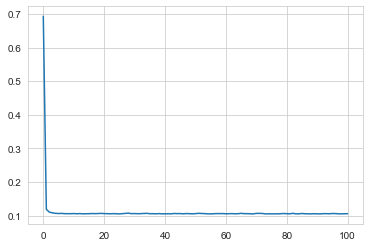

In [27]:
plt.plot(cost)

## Predictions and Evaluations

In [28]:
def predict(X_test, weights, threshold=0.5):
    
    def sigmoid(s):
        """
        s is an numpy array 
        return the sigmoid function of each element of s
        """
        return 1/(1 + np.exp(-s))
    
    def prob(X, w):
        return sigmoid(X.dot(w))
    
    one = np.ones((X_test.shape[0], 1))
    X_test = np.concatenate((one, X_test), axis=1) 
    predictions = np.zeros(X_test.shape[0])
    predictions[np.where(prob(X_test, w) > threshold)[0]] = 1
    return predictions

In [29]:
predictions = predict(X_test, w)

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



<AxesSubplot:>

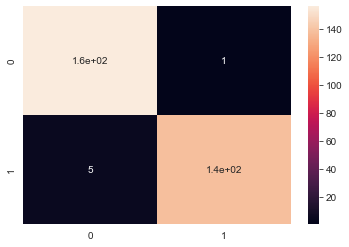

In [32]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)